In [1]:
!pip install gensim
!pip install WordCloud
!pip install tensorflow

In [31]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import keras
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = stopwords.words('english')

In [5]:
df = pd.read_csv('merged_dataset.csv')

In [6]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  words_in_title  \
0  Donald Trump just couldn t wish all Americans ...        0              12   
1  House Intelligence Committee Chairman Devin Nu...        0               8   
2  On Friday, it was revealed that former Milwauk...        0              15   
3  On Christmas day, Donald Trump announced that ...        0              14   
4  Pope Francis used his annual Christmas Day mes...        0              11   

   words_in_text  
0            470  
1            308  
2            592  
3            456  
4            420

In [7]:
df = df.drop(columns = ['words_in_title', 'words_in_text'], axis = 1)

In [8]:
df['combined_title_text'] = df['title'] + ' ' + df['text']

In [9]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  \
0  Donald Trump just couldn t wish all Americans ...        0   
1  House Intelligence Committee Chairman Devin Nu...        0   
2  On Friday, it was revealed that former Milwauk...        0   
3  On Christmas day, Donald Trump announced that ...        0   
4  Pope Francis used his annual Christmas Day mes...        0   

                                 combined_title_text  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An Internet Joke...  
3   Trump Is So Obsessed He Even Has Obama’s Name...  
4   Pope Francis Just Called Out Donald Trump Dur...

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('', text)

In [11]:
def preprocess_text(text):
  # To lowercase
  text = text.lower()
  # Remove HTML tags
  text = remove_tags(text)
  # Remove punctuations and numbers
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  # Single character removal
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
  # Remove multiple spaces
  text = re.sub(r'\s+', ' ', text)
  # Remove leading spaces
  text = re.sub(r'^\s+', '', text)
  # Remove Stopwords and remove words with 2 or less characters
  result = []

  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
      result.append(token)

  return result

In [12]:
df['preprocessed_text'] = df['combined_title_text'].apply(preprocess_text)

In [13]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  is_true  \
0  Donald Trump just couldn t wish all Americans ...        0   
1  House Intelligence Committee Chairman Devin Nu...        0   
2  On Friday, it was revealed that former Milwauk...        0   
3  On Christmas day, Donald Trump announced that ...        0   
4  Pope Francis used his annual Christmas Day mes...        0   

                                 combined_title_text  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                   preprocessed_text  
0  [donald, trump, sends, embarrassing, new, year...  
1  [drunk, bragging, trump, staffer, started, rus...  
2  [sheriff, david, clarke, internet, joke, threa...  
3  [trump, obsessed, obama, coded, website, image...  
4  [pope, francis, called, donald, trump, christm...

In [14]:
print(df['preprocessed_text'][0])

['donald', 'trump', 'sends', 'embarrassing', 'new', 'year', 'eve', 'message', 'disturbing', 'donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'reality', 'star', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'great', 'year', 'america', 'donald', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expect', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'allow', 'rise', 

In [15]:
df['text_joined'] = df['preprocessed_text'].apply(lambda x: ' '.join(x))

In [16]:
print(df['text_joined'][0])

donald trump sends embarrassing new year eve message disturbing donald trump wish americans happy new year leave instead shout enemies haters dishonest fake news media reality star job country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy new year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy new year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval decembe

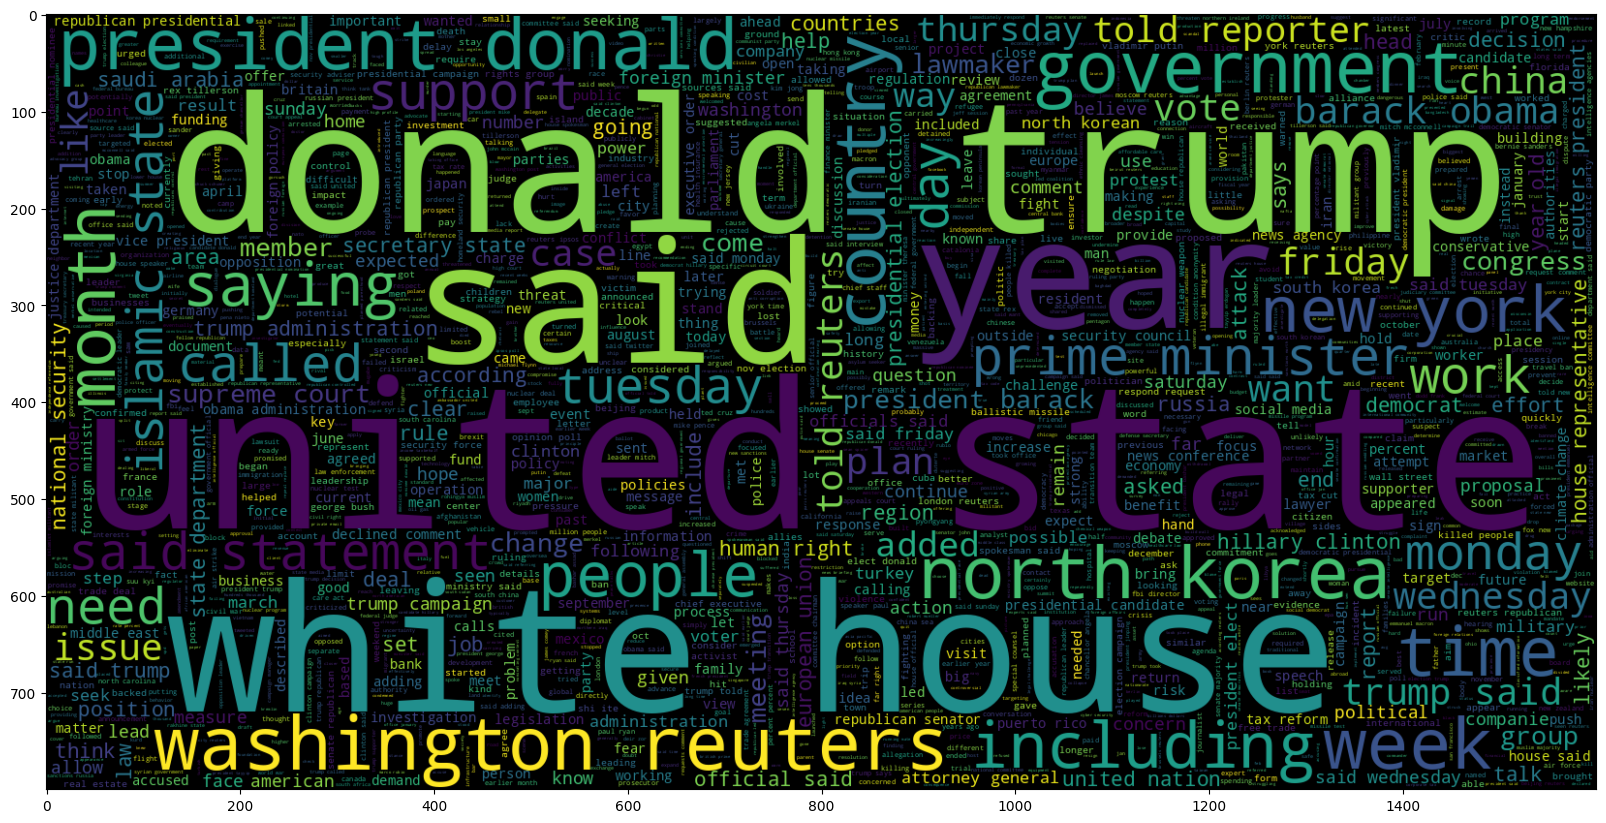

In [17]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(' '.join(df[df['is_true'] == 1]['text_joined']))
plt.imshow(wc, interpolation = 'bilinear')

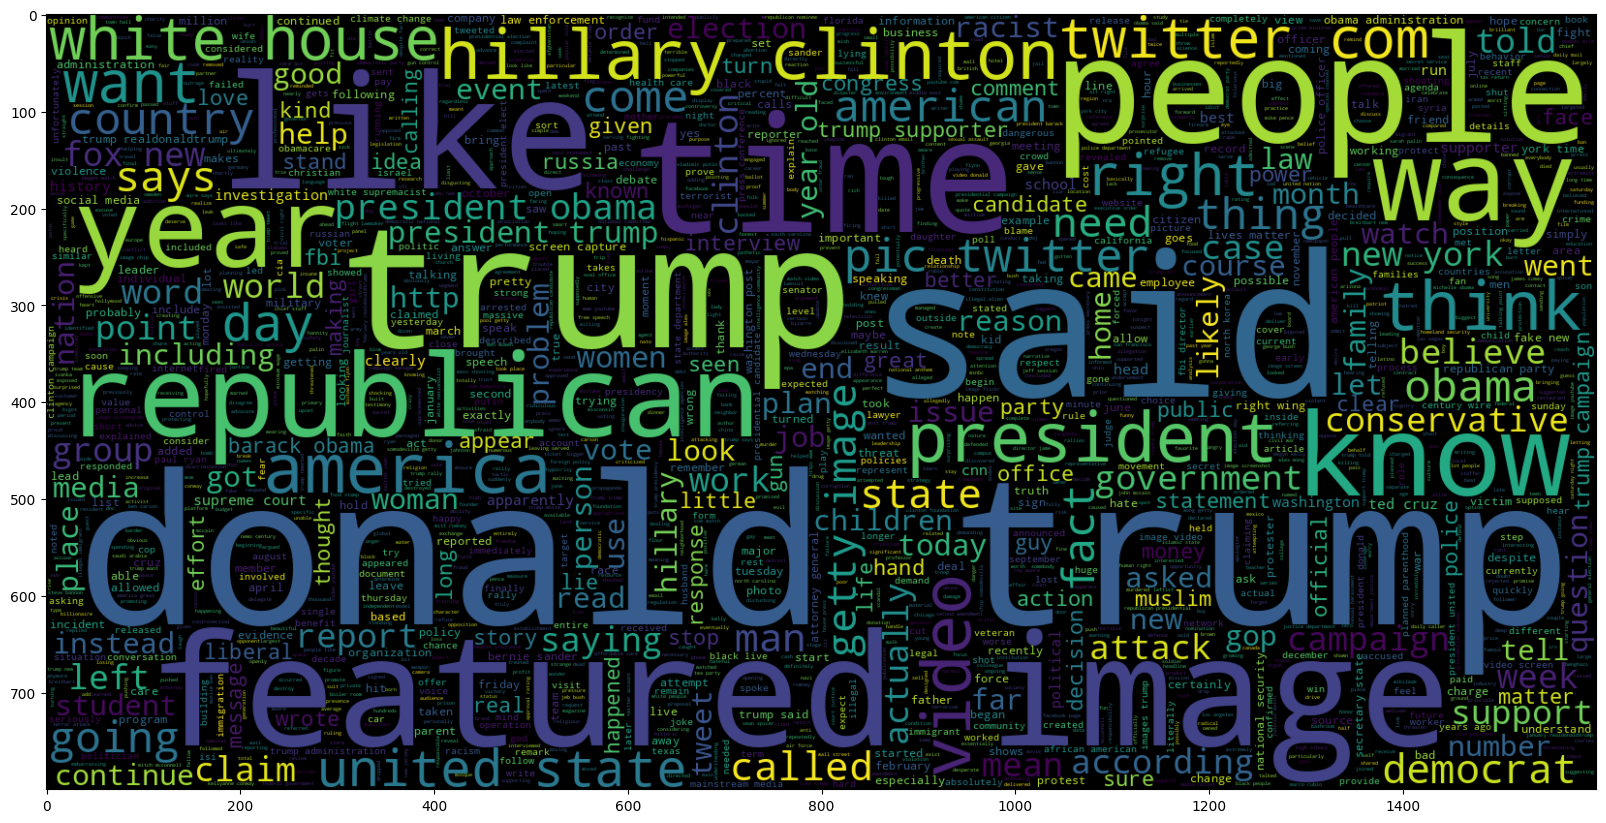

In [18]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(' '.join(df[df['is_true'] == 0]['text_joined']))
plt.imshow(wc, interpolation = 'bilinear')

<Axes: xlabel='text_joined', ylabel='Count'>

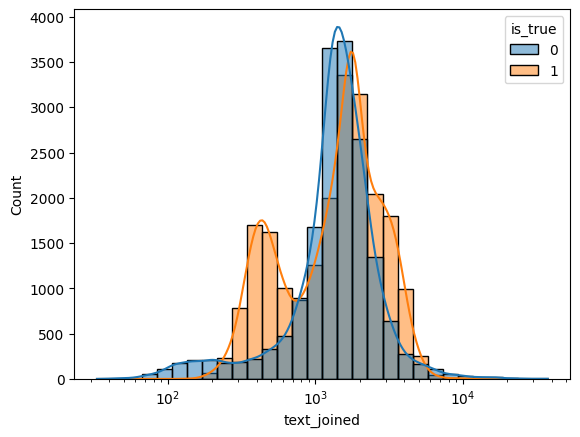

In [19]:
sns.histplot(x = df['text_joined'].str.len(), bins = 30, kde = True, hue = df['is_true'], log_scale = True)

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(df['text_joined'], df['is_true'], test_size = 0.3, random_state = 42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42, shuffle = True)

In [21]:
df['number_of_words'] = df['text_joined'].apply(lambda x: len(x.split()))
number_of_words = df['number_of_words'].sum()
print(number_of_words)

8389632


In [22]:
max_words = df['number_of_words'].max()
print(max_words)

4584


In [23]:
tokenizer = Tokenizer(num_words = number_of_words)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
validation_sequences = tokenizer.texts_to_sequences(X_val)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [24]:
print(len(train_sequences))
print(len(validation_sequences))
print(len(test_sequences))

27060
5799
5799


In [30]:
print(train_sequences[0])

[411, 10230, 4924, 13376, 1223, 823, 6182, 6, 411, 10230, 10459, 6182, 85, 5893, 3806, 4, 186, 26, 5986, 2467, 2557, 2467, 10460, 1382, 12802, 307, 1818, 908, 25821, 34529, 3241, 219, 2547, 587, 896, 4025, 3653, 2, 426, 11, 1384, 864, 44701, 618, 3738, 1481, 177, 1813, 56213, 896, 837, 262, 687, 102, 20045, 56214, 2, 13377, 525, 1405, 5893, 3806, 148, 262, 823, 3265, 969, 4989, 2753, 211, 2398, 208, 1405, 3806, 2724, 3738, 2, 1223, 136, 5986, 1327, 1363, 61, 5765, 464, 3171, 5765, 698, 1171, 2047, 1484, 482, 1611, 2467, 3525, 2725, 10346, 671, 8432, 16552, 13171, 2990, 672, 6642, 124, 1146, 6683, 64, 1729, 51, 1870, 2228, 472, 1027, 18840, 5804, 97, 3822, 2557, 477, 1572, 97, 23371, 837, 6434, 1428, 25822, 6801, 15154, 1658, 1223, 44, 5468, 2894, 20762, 867, 1881, 1632, 1219, 4331, 1282, 240, 2, 27440, 16553, 3893, 776, 3475, 29266, 3534]


<Axes: ylabel='Count'>

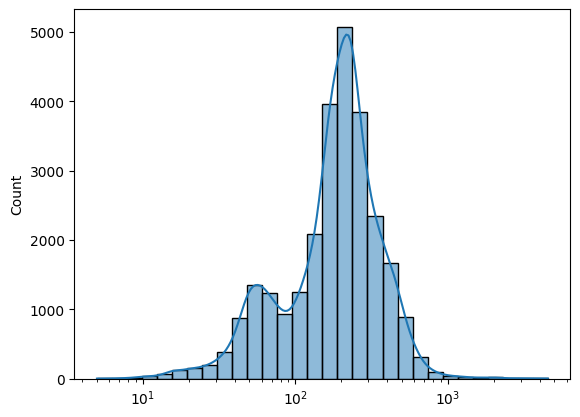

In [40]:
sns.histplot(x = [len(seq) for seq in train_sequences], bins = 30, kde = True, log_scale = True)

In [41]:
padded_train = pad_sequences(train_sequences, maxlen = max_words, padding = 'post', truncating = 'post')
padded_val = pad_sequences(validation_sequences, maxlen = max_words, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = max_words, padding = 'post', truncating = 'post')

In [33]:
print(padded_train[0])

[  411 10230  4924 ...     0     0     0]
